In [3]:
import numpy as np
from sympy import init_printing, Matrix
init_printing()

In [9]:
def get_pivot_position(matrix, index):
    return np.argmax(matrix[index:, index]) + index, index

def get_pivot(matrix, index_row, index_col):
    return matrix[index_row, index_col]

def swap_rows(matrix, index_row_1, index_row_2):
    matrix[[index_row_1, index_row_2]] = matrix[[index_row_2, index_row_1]]

def reducedRowEchelonFormNP(matrix):
    matrix = matrix.astype(float)
    dim_row, dim_col = matrix.shape
    loops = min(dim_row, dim_col)

    for index in range(loops):
        pivot_index_row, pivot_index_col = get_pivot_position(matrix, index)
        pivot = get_pivot(matrix, pivot_index_row, pivot_index_col)

        if pivot == 0:
            continue

        if pivot_index_row != index:
            swap_rows(matrix, index, pivot_index_row)
        
        for row in range(index + 1, dim_row):
            multiplier = matrix[row, index] / pivot
            matrix[row, index:] -= multiplier * matrix[index, index:]
            print(matrix)

        for row in range(index - 1, -1, -1):
            multiplier = matrix[row, index] / pivot
            matrix[row, index:] -= multiplier * matrix[index, index:]
            print(f'R{row} - {multiplier}R{index}')
            print(matrix)

        for row in range(dim_row):
            display(f'{1/matrix[row, row]} R{row}')
            matrix[row, :] /= matrix[row, row]
            print(matrix)

In [5]:


def get_pivot_position(matrix, index):
    """Find the pivot position."""
    return np.argmax(matrix[index:, index]) + index, index

def get_pivot(matrix, index_row, index_col):
    """Get the pivot element."""
    return matrix[index_row, index_col]

def reducedRowEchelonForm(matrix, steps=False):
    """Convert the given matrix into Reduced Row Echelon Form."""
    dim_row, dim_col = matrix.shape
    loops = min(dim_row, dim_col)
    
    if steps:
        print("Initial matrix:")
        display(matrix)

    for index in range(loops):
        pivot_index_row, pivot_index_col = get_pivot_position(matrix, index)
        pivot = get_pivot(matrix, pivot_index_row, pivot_index_col)

        if pivot == 0:
            continue

        # Swap rows if necessary
        if pivot_index_row != index:
            matrix.row_swap(index, pivot_index_row)
        
        # Zero out below
        for row in range(index + 1, dim_row):
            multiplier = matrix[row, index] / pivot
            matrix[row, index:] -= multiplier * matrix[index, index:]
            if steps:
                print(f'R{row} - {multiplier} * R{index}')
                display(matrix)
        
        # Zero out above
        for row in range(index - 1, -1, -1):
            multiplier = matrix[row, index] / pivot
            matrix[row, index:] -= multiplier * matrix[index, index:]
            if steps:
                print(f'R{row} - {multiplier} * R{index}')
                display(matrix)

        # Normalize the pivot row
        for row in range(dim_row):
            if matrix[row, row] == 0 or matrix[row, row] == 1:
                continue
            if steps:
                print(f'{1/matrix[row, row]} * R{row}')
            matrix[row, :] /= matrix[row, row]
            if steps:
                display(matrix)
    if steps:
        print("Final matrix:")
    return matrix


In [ ]:
def remove_zero_rows(matrix):
    """Remove zero rows from the given matrix."""
    matrix = matrix.tolist()
    for i, row in enumerate(matrix):
        if all([element == 0 for element in row]):
            matrix.pop(i)
    return Matrix(matrix)

In [ ]:
from sympy import Matrix, zeros, nsimplify, Rational

def apply_minus_one_trick(matrix):
    rows, cols = matrix.shape
    max_size = max(rows, cols)

    square_matrix = zeros(max_size)

    for row in range(rows):
        if matrix[row, row] == 0:
            square_matrix[row, row] = -1
            square_matrix[row + 1, :cols] = matrix[row, :]
        else:
            square_matrix[row, :cols] = matrix[row, :]

    for i in range(rows, max_size):
        square_matrix[i, i] = square_matrix[i, i] or -1

    return square_matrix

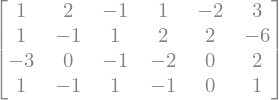

In [6]:
A = Matrix([[1, 2, -1, 1, -2, 3], [1, -1, 1, 2, 2, -6], [-3, 0, -1, -2, 0, 2], [1, -1, 1, -1, 0, 1]])
A

Initial matrix:


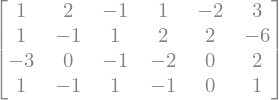

R1 - 1 * R0


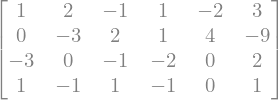

R2 - -3 * R0


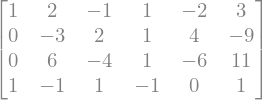

R3 - 1 * R0


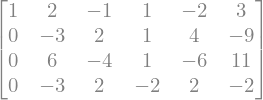

-1/3 * R1


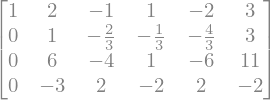

-1/4 * R2


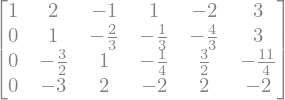

-1/2 * R3


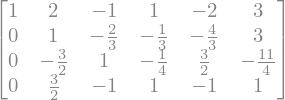

R2 - -1 * R1


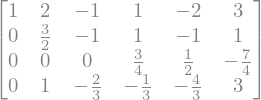

R3 - 2/3 * R1


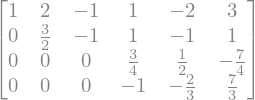

R0 - 4/3 * R1


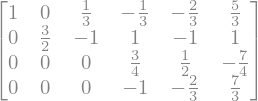

2/3 * R1


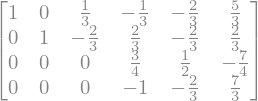

-1 * R3


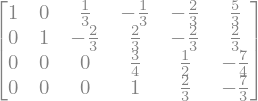

R2 - 3/4 * R3


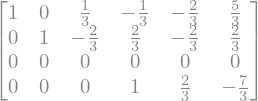

R1 - 2/3 * R3


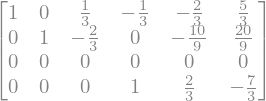

R0 - -1/3 * R3


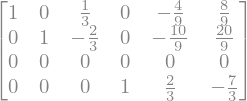

Final matrix:


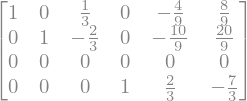

In [7]:
reducedRowEchelonForm(A, steps=True)

In [56]:
rref = reducedRowEchelonForm(A)

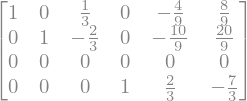

In [57]:
rref

In [58]:
def remove_zero_rows(matrix):
    """Remove zero rows from the given matrix."""
    matrix = matrix.tolist()
    for i, row in enumerate(matrix):
        if all([element == 0 for element in row]):
            matrix.pop(i)
    return Matrix(matrix)
    

In [59]:
rref = remove_zero_rows(rref)

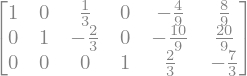

In [60]:
rref

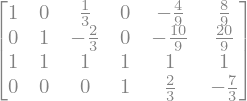

In [61]:
rref.row_insert(2, Matrix([[0, 0, -1, 0, 0, 0]]))

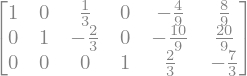

In [98]:
rref

In [159]:
from sympy import Matrix, zeros, nsimplify, Rational

def apply_minus_one_trick(matrix):
    rows, cols = matrix.shape
    max_size = max(rows, cols)

    square_matrix = zeros(max_size)

    for row in range(rows):
        if matrix[row, row] == 0:
            square_matrix[row, row] = -1
            square_matrix[row + 1, :cols] = matrix[row, :]
        else:
            square_matrix[row, :cols] = matrix[row, :]

    for i in range(rows, max_size):
        square_matrix[i, i] = square_matrix[i, i] or -1

    return square_matrix


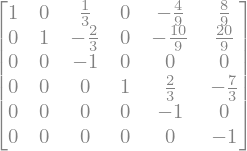

In [152]:
apply_minus_one_trick(rref)

In [174]:
v_A = Matrix([1/3, -2/3, -1])
v_B = Matrix([0, 0, 0])

In [182]:
A = Matrix([[1, 2, -1], [1, -1, 1], [-3, 0, -1], [1, -1, 1]], rational = True)
B = Matrix([[-1, 2, 3], [-2, -2, 6], [2, 0, -2], [1, 0, -1]], rational = True)

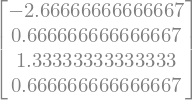

In [183]:
nsimplify(A@v_A)

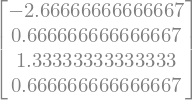

In [184]:
B@v_B

In [191]:
v_A = Matrix([Rational(-4, 9), Rational(-10, 9), Rational(0)], rational = True)
v_B = Matrix([Rational(2, 3), -1, 0], rational = True)

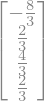

In [192]:
nsimplify(A*v_A)

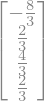

In [193]:
B@v_B

In [194]:
v_A = Matrix([Rational(8, 9), Rational(20, 9), 0], rational = True)
v_B = Matrix([Rational(7, 3), 0, -1], rational = True)

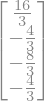

In [195]:
A*v_A

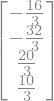

In [196]:
B@v_B

In [197]:
A = Matrix([[1, 3, 0, 0, 3], [0, 0, 1, 0, 9], [0, 0, 0, 1, -4]])

Initial matrix:


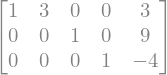

R1 - 0 * R0


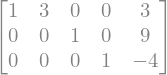

R2 - 0 * R0


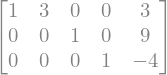

Final matrix:


In [198]:
rref = reducedRowEchelonForm(A, steps=True)

In [199]:
a = apply_minus_one_trick(rref)

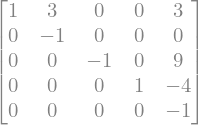

In [200]:
a

In [201]:
b = Matrix([3, -1, 0, 0, 0])
c = Matrix([3, 0, 9, -4, -1])

In [202]:
A@b

In [203]:
A@c

In [204]:
A = Matrix([[1, 0, 2, 0, 1, 0, 0, 0], [1, 1, 0, 0, 0, 1, 0, 0], [1, 2, 0, 1, 0, 0, 1, 0], [1, 1, 1, 1, 0, 0, 0, 1]])

Initial matrix:


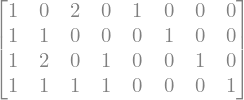

R1 - 1 * R0


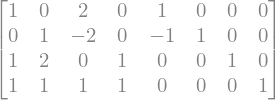

R2 - 1 * R0


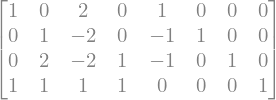

R3 - 1 * R0


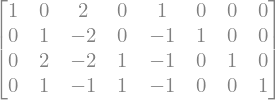

-1/2 * R2


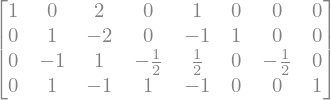

R2 - -1 * R1


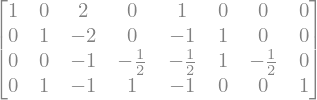

R3 - 1 * R1


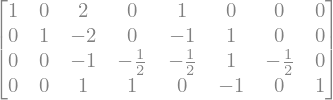

R0 - 0 * R1


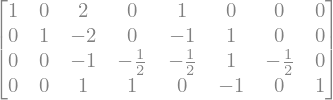

-1 * R2


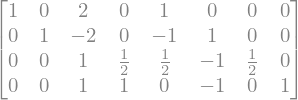

R3 - 1 * R2


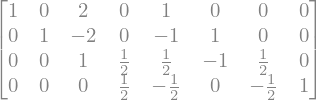

R1 - -2 * R2


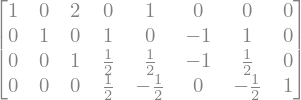

R0 - 2 * R2


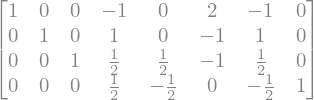

2 * R3


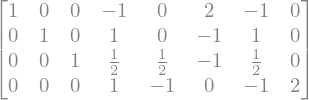

R2 - 1/2 * R3


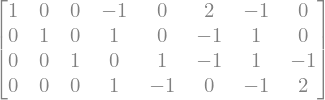

R1 - 1 * R3


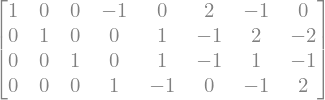

R0 - -1 * R3


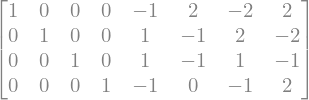

Final matrix:


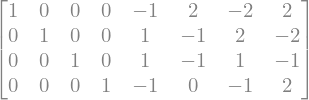

In [205]:
reducedRowEchelonForm(A, steps=True)